In [56]:
import datetime
import os
import re
import urllib
import sys
import math
import numpy as np
import pandas as pd
from scipy.stats import describe

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
%matplotlib inline

from wordcloud import WordCloud
import networkx as nx

In [2]:
# Data files

# article_id, article_url
SRC_ARTICLES = '../data/guardian-all/articles-standardized.csv'
SRC_AUTHORS = '../data/guardian-all/authors-standardized.csv'
SRC_COMMENTS = '../data/guardian-all/sorted_comments-standardized.csv'

OUTPUT_DIR = './week-1-2-plots'

def plot_timestamps(article_id):
    datetimes = data[data['article_id'] == article_id]['timestamp']
    timestamps = [int(datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").timestamp()) for x in datetimes]
    plt.hist(timestamps)

In [3]:
data_articles = pd.read_csv(SRC_ARTICLES)  # shape = (626395, 2)
data_articles_pol_2016 = data_articles[data_articles['article_url'].str.contains('/politics/2016')]  # shape = (1782, 2)
data_authors = pd.read_csv(SRC_AUTHORS)
# data_comments = pd.read_csv(SRC_COMMENTS, nrows=10)

In [175]:
article_ids = set(data_articles_pol_2016['article_id'].values[:200])
data_comments_pol_2016 = []
headline = pd.read_csv(SRC_COMMENTS, nrows=10)
for df_chunk in pd.read_csv(SRC_COMMENTS, header=None, skiprows=0, chunksize=1000000):
    print('.', end='')
    matches = df_chunk[df_chunk[0].isin(article_ids)]
    if len(matches):
        data_comments_pol_2016.append(matches)
        print(len(matches), end='')
data_comments_pol_2016 = pd.concat(data_comments_pol_2016)
data_comments_pol_2016.columns = headline.columns  # shape = (40974, 7)

c:\users\thomas\hpi\textmi~1\venv\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


.399.35521.2897.329.1828.........................................................

In [178]:
amount_of_comments = data_comments_pol_2016['article_id'].value_counts()
articles_with_50_comments = amount_of_comments[amount_of_comments == 50].index.values
data_50_comments_pol_2016 = data_comments_pol_2016[data_comments_pol_2016['article_id'].isin(articles_with_50_comments)]
articles_with_50_comments = data_articles_pol_2016.merge(pd.DataFrame(articles_with_50_comments, columns=['article_id'])).values
# 70 Artikel mit je 50 Kommentaren (insgesamt 3500 Kommentare)
# Check: 13543, 13544, 13564, 13569, 13608 - all have a lot more comments

### Amount of comments

Mean: 210.12307692307692


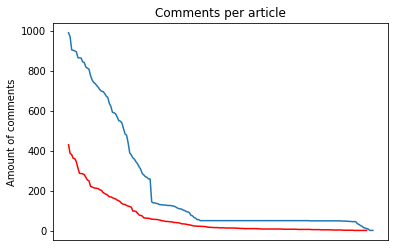

In [230]:
# plt.figure(figsize=(10, 10))
# plt.subplot(6, 2, 1)
amount_of_comments = data_comments_pol_2016['article_id'].value_counts()
plt.plot(amount_of_comments.values)
amount_of_parent_comments = data_comments_pol_2016[data_comments_pol_2016['parent_comment_id'].isnull()]['article_id'].value_counts()
plt.plot(amount_of_parent_comments.values, color='red')
plt.title('Comments per article')
plt.ylabel('Amount of comments')
plt.xticks([])
plt.savefig('Comments-in-political-articles-2016.pdf')
print('Mean: {}'.format(amount_of_comments.mean()))

In [18]:
def get_articles_words(article_id):
    # Get text of all comments
    comments_content = ' '.join(data[data['article_id']== article_id]['comment_text'])
    wordcloud = WordCloud().generate(comments_content)
    # plt.imshow(wordcloud)
    allWords = [word_info[0][0].lower() for word_info in wordcloud.layout_]
    # top100Words = allWords[:100]
    return allWords

# Select a random article with 50 comments
article_id = articles[articles['comment_id'] == 50].index[0]

def find_average_articles_with_words(words):
    words_set = set(words)
    # all articles with 50 comments
    average_articles = articles[articles['comment_id'] == 50].index
    print(len(average_articles))
    average_articles = average_articles[:100]
    common_words = [(x, words_set & set(get_articles_words(x))) for x in average_articles]
    matched_articles = [(id_, common) for (id_, common) in common_words if common]
    print(len(matched_articles))
    return matched_articles

trump_articles = find_average_articles_with_words(['brexit'])

2583
36


In [38]:
average_articles = articles[articles['comment_id'] == 50].index
# top_words = [(x, get_articles_words(x)[:10]) for x in average_articles[:200]]
# top_words_300 = [(x, get_articles_words(x)[:10]) for x in average_articles[200:300]]

In [53]:
# For parsing the datetime string
# datetime.datetime.strptime(timestampStr, "%Y-%m-%dT%H:%M:%SZ").timestamp()
[x for x in top_words_200 if 'brexit' in x[1]]

[(1134,
  ['will',
   'say',
   'eu',
   'brexit',
   'people',
   'think',
   'vote',
   'good',
   'new',
   'us']),
 (12999,
  ['will',
   'brexit',
   'uk',
   'eu',
   'government',
   'think',
   'now',
   'mean',
   'answer',
   'one']),
 (13001,
  ['brexit',
   'will',
   'eu',
   'uk',
   'want',
   'year',
   'tories',
   'vote',
   'one',
   'day']),
 (13010,
  ['uk',
   'eu',
   'will',
   'deal',
   'people',
   'brexit',
   'party',
   'make',
   'country',
   'economic']),
 (13086,
  ['mr',
   'will',
   'eu',
   'right',
   'brexit',
   'bill',
   'smith',
   'stephen',
   'people',
   'vote']),
 (13091,
  ['will',
   'tory',
   'one',
   'think',
   'corbyn',
   'brexit',
   'party',
   'may',
   'tories',
   'good']),
 (13093,
  ['eu',
   'uk',
   'will',
   'people',
   'now',
   'brexit',
   'power',
   'well',
   'british',
   'year']),
 (13099,
  ['eu',
   'uk',
   'climate',
   'will',
   'year',
   'brexit',
   'us',
   'climate change',
   'live',
   'want']),
